### **AGENDA**

1. Neural network
2. TensorFlow implementation
3. Activation Function
- Sigmoid function
- ReLU (Rectified Linear Unit) function
- Softmax Function
4. Advanced optimization
5. Back propagation
6. 


### **1. Neural Network**



1. Create the model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units = 25, activation='sigmoild'),
    Dense(units = 15, activation='sigmoild'),
    Dense(units = 1, activation='sigmoild'),
])

2. Loss and Cost functions

In [ ]:
#This is model for binary classification
from tensorflow.keras.losses import BinaryCrossentropy
model.compile(loss= BinaryCrossentropy())

#using different loss function for linear regression 
from tensorflow.keras.losses import MeanSquaredError
model.compile(loss=MeanSquaredError())

3. Gradient descent

Use back propagation to compute derivatives for gradient descent

In [ ]:
model.fit(X,y, epochs=100)

**NEURAL NETWORK WITH SOFTMAX OUTPUT**

In [ ]:
model = Sequential([
    Dense(units = 25, activation='relu'),
    Dense(units = 15, activation='relu'),
    Dense(units = 1, activation='softmax'),
])

#model.compule(loss=SpareCategoricalCrossEntropy())
#we can use this code, but this below code is highly recommened to use

model.compile(loss = SparseCategoricalCrossEntropy(from_logits=True))
#This is more numerically accurate than the previous code

model.fit(X,y, epochs=100)

logits = model(X)
f_x = tf.nn.softmax(logits)

**MNIST ADAM**

In [ ]:
#model
model = Sequential([
    tf.keras.layers.Dense(units=25, activation='sigmoid'),
    tf.keras.layers.Dense(units=15, activation='sigmoid'),
    tf.keras.layers.Dense(units=10, activation='linear')
])

#compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

#fit
model.fit(X,Y, epochs=100)

**Neural network**

A neural network is a computational model inspired by human brain function. It consists of interconnected processing nodes, which are organized in layers (input, hidden and output layer). Each neuron applies mathematical operation to its inputs and passes its output to the next layer. Neural networks are effective when dealing with high-dimensional data like images, text, and audio. 

**Activation function in neural network**

Activation functions decide whether a neuron should be activated or not by calculating the weighted sum and further adding bias with it. Its purpose is to introduce non-linearity into the output of a neuron.

If we do not use activation function, instead a linear function, all neural network will behave like a single layer. This means that if you stack multiple layers with linear activation functions in a neural network, the entire network is equivalent to a single-layer network, because the whole network is just doing one big linear transformation. 

When we use non-linear activation function, given enough neuron and layers, this is a key reason why neuron network can learn to represent very complicated relationships between their inputs and outputs. 

**Weighted sum and bias**

In a neural network, each neuron receives input from some previous neurons, or from an external source (eg. input data). Each of these connections is associated with a weight. The neuron multiplies each input by the corresponding weight and then sum up all of these products. The weights are like the strength of the connections between neurons, determining how much influence one neuron has on the next. The bias is like a neuron's individuality, determining how easily it gets activated regardless of its inputs.


**Sigmoid function**

The output of sigmoid function is in the range of 0 and 1, which can be used to represent probabilities for binary classification problems. However, the sigmoid function is not commonly used in modern deep learning application because it suffers from a vanishing gradients problems, making it hard to optimize deep neural networks. 


a = f(x) = 1/(1+e^-(wx+b))

a: the output of the sigmoid function
e: the base of natural logathms
x: the input to the function

When input x is very large, e^(-wx+b) becomes close to 0 and a become close to 1.
When the input x is very small, e^(-wx+b) become close to 1 and a becomes close to 0.
When input x is 0, e^(-wx+b) is 1 and a is 1/2

Because of this properties, the output of sigmoid function can be interpreted as a probability, which is why it is often used in binary classification problems. 

**Why sigmoid is not widely used in deep learning?**

Sigmoid function squashes its input into a very small range between 0 and 1. As a result, when you calculate the gradient (the derivative) of the sigmoid function, the values can become very small. When training a deep neural network using backpropagation, these small gradient are multiplied together over many layers, which can cause the gradient to become infinitesimally small. This means that the weights and biases of the network are not adjusted much during training called vanishing gradient problem. 


**ReLU Function**

ReLU, or Rectified Linear Unit is defined as g(z) = max(0,z). In other words, the output is the input directly if it is positive, otherwise, it will be 0. This means that the ReLU function allows positive values to pass through unchanged, while negative values are mapped to 0.

ReLU has become very popular because it overcomes the vanishing gradient problem, allowing models to learn faster and perform better. It is commonly used in convolutional neural networks (CNNs) and deep learning networks in general.


It can greatly accelerate the convergence of stochastic gradient descent compared to sigmoid or tank function. However, ReLU can lead to dead neurons for example which stuck in the negative half of their domain so they will always be 0. 

**Softmax function**

Softmax is a generalization of logistic regression, which is a binary classification algorithm to the multiclass classification context. 

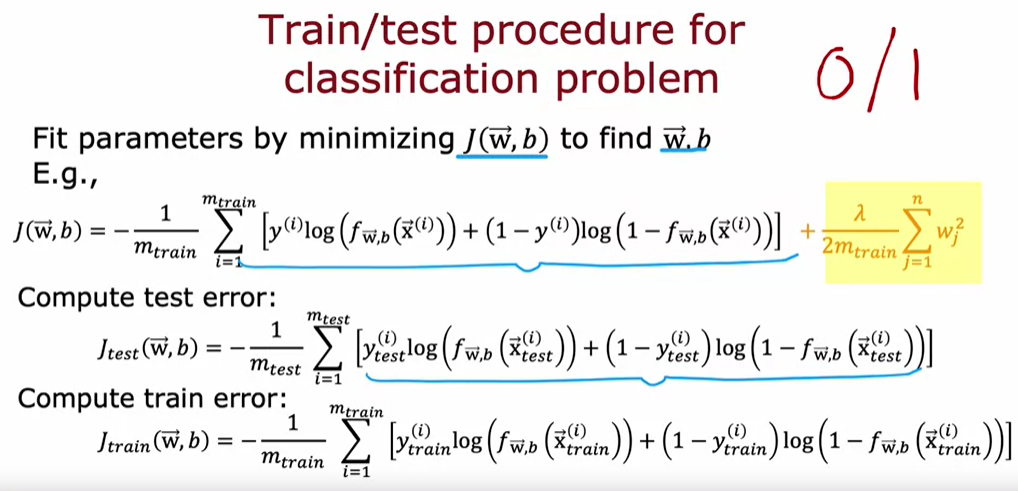

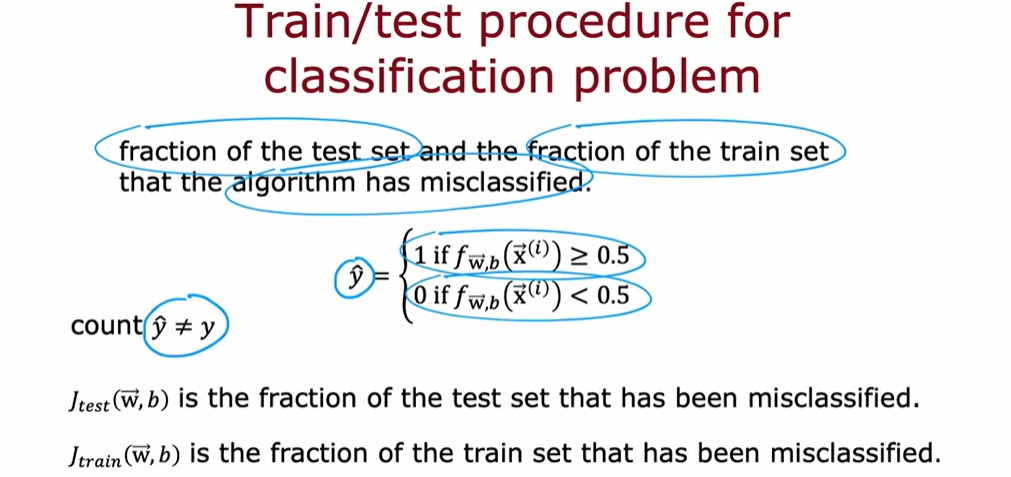

Once parameters w, b are fit to the training set the training error Jtrain(w,b) is likely lower than the actual generalization error

Jtest(w,b) is better estimate of how well the model will generalize to new data compared to Jtrain(w,b)

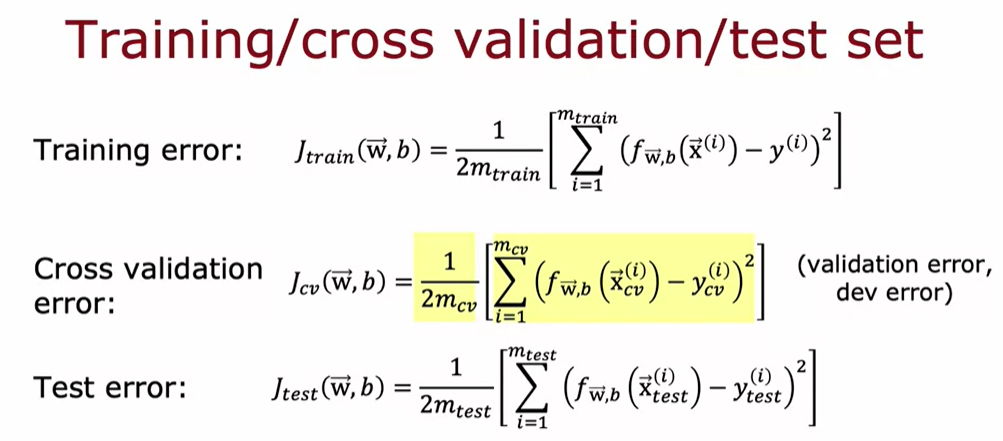

### **Dianosing bias and variance**

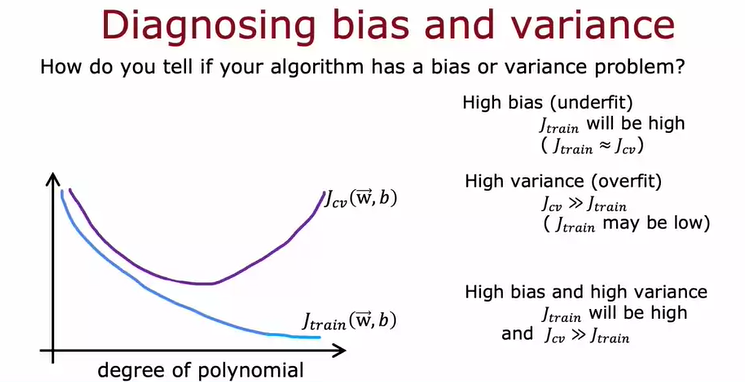

In case of having both high bias and high variance, a part of the input has overfit with high variance and another part of the input has underfit with high bias. 

**Regularization and bias/variance**

Lambda is the regularization paramter that controls how much you trade-off keeping the paraeters w small versus fitting the training data well. 

Regularization is the technique which add the penalty term to discourages excessive complexity or large parameter values, prioritize simpler and more generalizable solutions.

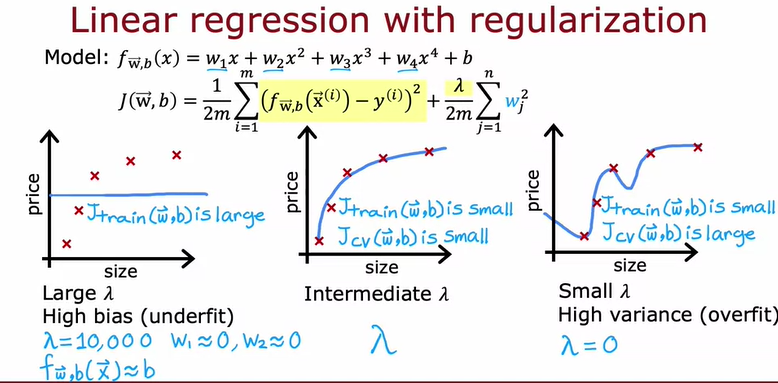

In the ptimization cost function, the larger lambda is, the more the algorithm is trying to keep W squared small. That is, the more weight is given to this regularization term, and thus the less attention is paid to actually do well on the training set.

**Establishing a baseline level of performance**

What is the level of error you can reasonably hope to get to?
- Human level performance
- Competing algorithm performance
- Guess based on experience

Real-world data can be very noisy and it's often infeasible to get to 0% error. For example, you might think that you have a high bias problem because you're getting 10% training and 15% cross validation error on a computer vision application. However, you later found out that even humans can't perform better than 10% error. If you consider this the baseline level, then you now instead have a high variance problem because you've prioritized minimizing the gap between cross validation and training error.

**Learning curve**

Learning curves areused to understand how your learning algorithm is doing as a function of the amount of experience it has. whereby experience.

High bias:
- Inrease the size of the training set will not significantly improve the performance of a learning algorithm with high bias
- Extending the curves in the plot to the right will result in flattening indicating that the algorithm's performance will not reach human-level or improve substantially.

High variance
- When dealing with high variance, fitting a model with small or zero lambda results in overfitting to the training data without generalizing well.
- The training error (Jtrain) increases as the training set size increases, while the cross-validation error (Jcv) remains much higher.
- Increasing the training set size can help address high variance by causing the training error to increase while the cross-validation error decreases towards J train.
- Unlike the high bias case, where increasing training data does not significantly improve performance, high variance benefits from more training data.


**Deciding what to try next revisited**

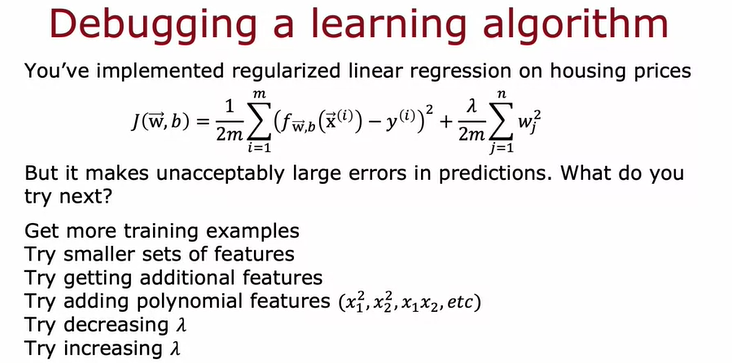

To fix a high bias problem, you can:
* try adding polynomial features
* try getting additional features
* try decreasing the regularization parameter

To fix a high variance problem, you can:
* try increasing the regularization parameter
* try smaller sets of features
* get more training examples

**The bias variance tradeoff**

The tradeoff is that you have to balance the complexity that is the degree of polynomial or the regularization paraeter longer to make buyers or variants both not be too high.

Large neural networks are low bias machines

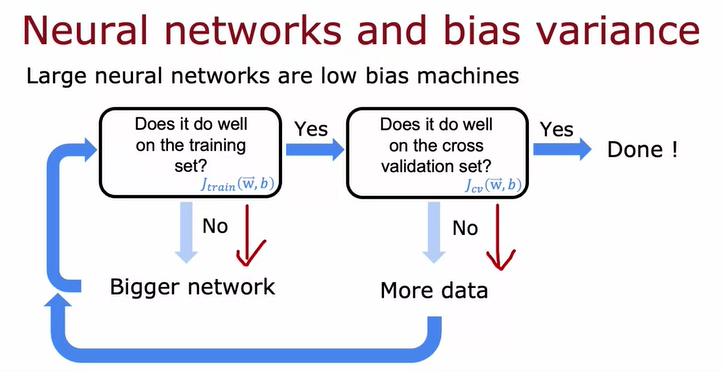

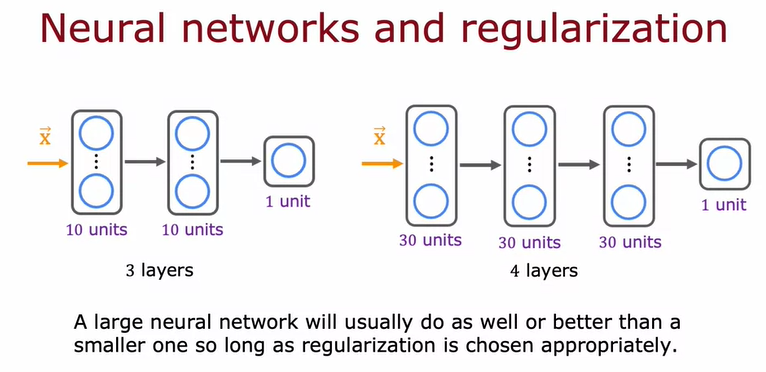

Switch from small to large neural network -> overfitting -> if use regularize -> larger neural network perform better.

In [ ]:
#Unregularized MNIST model
layer_1 = Dense(units=25, activation="relu")
layer_2 = Dense(units=15, activation="relu")
layer_3 = Dense(units=1, activation="sigmoid")
model = Sequential([layer_1, layer_2, layer_3])

#Regularized MNIST model
layer_1 = Dense(units=25, activation="relu", kernel_regularizer = L2(0.01))
layer_2 = Dense(units=15, activation="relu", kernel_regularizer = L2(0.01))
layer_3 = Dense(units=1, activation="sigmoid", kernel_regularizer = L2(0.01))
model = Sequential([layer_1, layer_2, layer_3])

### **ML DEVELOPMENT PROCESS**


**Iterative loop of ML development**

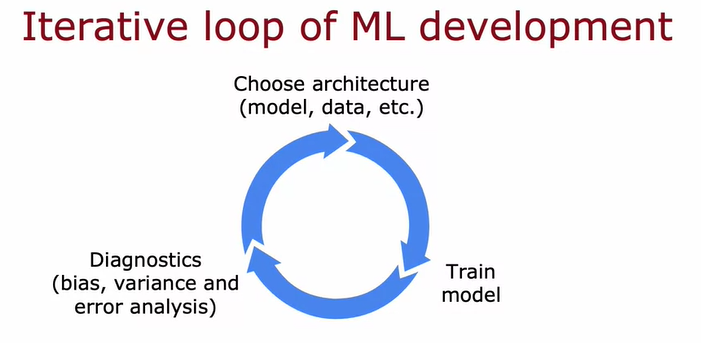

Example: Spam sclassifier

How to reduce your spam classifier's error?
- Collect more data
- Developing sophisticated features based on email routing (from email header)
- Define sothisticated features from email boday. E.g. should discountign and discount be treated as the same word.
- Design algorithms to detect misspellings

**Adding or collecting or creating more data**

- Add more data of everything
- Add more data of the types where error analysis has indicated it might help.
- Beyond getting brand new training example (x,y), another technique: Data augmentation
    * Modifying an existing training example to create a new training example
    * Data augmentation by introducing distortions: Distortion introduced should be representation of the type of noise/distortions in the test set.

Data synthesis: using artificial data inputs to create a new training example
-> most used in computer vision toss and less for other applications. Not much for audio

Engineering the data used by your system:
- Conventional model-centric approach
- Data-cetric approach
  
$AI = Code (algorithm/model) + Data$

**Transfer learning: Using data from a different task**

What is this technique?
- Scarcity of data for a specific task.
- Ultilizeing data from a different but related task to enhance the learning process. 

> For example: Train a neural network on a large dataset, for example, one million images of a thousand different classes like cats, dogs, cars, people... The neural network learns to identify any of these 1000 classes, generating parameters for each layers of the network. To apply transfer learning, a copy of the network is created, retaining parameters from the earlier layers. The last layer, however, is replaced with a smaller output layer with just 10 output units, corresponding to the digits zero to nine. Since the dimension of this layer has changed, new parameters for this layer are derived and trained from scratch.

How to train?
- Option 1: Only train output layers parameters
- Option 2: Train all parameters in the network, but the first four layers will be intialized using the values that you had trained on top.

If having very small training set -> option 1
If having a large training set -> option 2

Supervised-pretraining -> train the neural network on a very large dataset of not quite related task

Fine tunning: Take the parameters and had initialized or gottern from Supervised-pretraining and then run the gradient descent further to fine tune the weights to suit the application of the task.

Why transfer learning work?

The limitation: image type X is the same for the pre-training and fine-tuning steps -> if the final task you want to solve is computer vision task, then pre-training step also has been a neural network trained on the same type of input namely an image of the desired dimensions. 

Summary:
- Download neural network parameters pretrained on a large dataset with same input type as your application.
- Further train (fine tune) the network on your own data.


**Full cycle of a ML project**

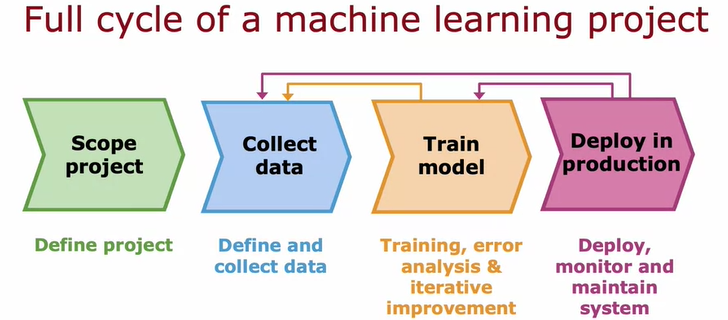

### **SKEWED DATASETS**

**Error metrics for skewed datasets**

An example about rare disease, we train classifier model, find that we got 1% error on test set and 9% correct diagnoses because only 1% patient have that rare disease -> dumb algorithm. We have 3 models, in which, one model has 0.5% error, one model has 1% error and another model has 1.2% error. However, we can not know exactly which model is more efficient. For example, model with 0.5% can't predict patient with rare disease while model with 1% can predict few patient with rare disease. 

-> Therefore, when working with the skewed dataset, we usually use a different error metric rather than just classification error to measure how well your learning algorithm is doing. 

> **Precision/recal**
> 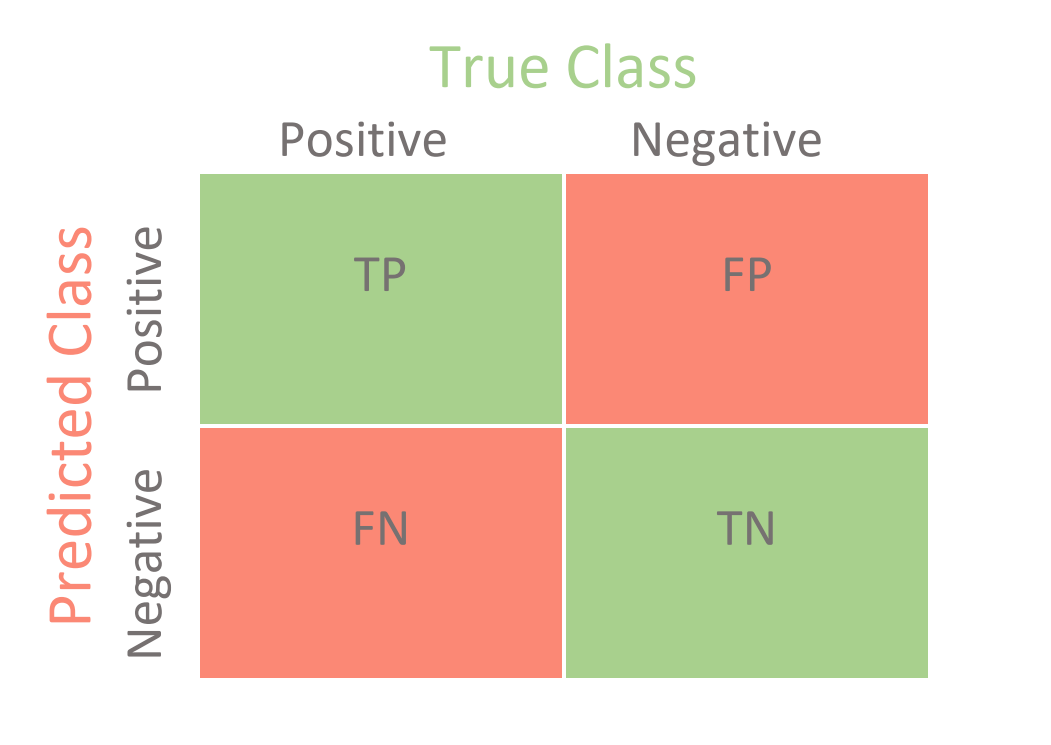
>
> y = 1 in presence of rare class we want to detect.
>
> $ Precision = TP / Predicted Positive = TP / TP + FP $
>
> $ Recall = TP / Actual Positive = TP / TP + FN $
>
> 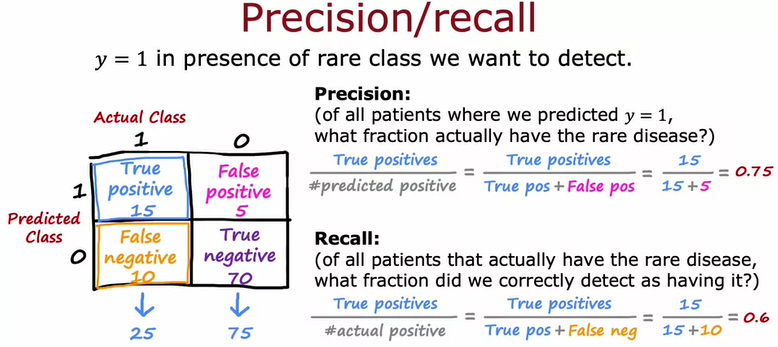
> 
> A learning algorithm with either zero precision or rezo recall is not a usefull algorithm. If an algorithm actually predicts rezo all the time, precision actually becomes underfied. But, in practice, if an algorithm doesn't predict even a single positive, we just say the presision equal 0. 


**Trading off precision and recall**

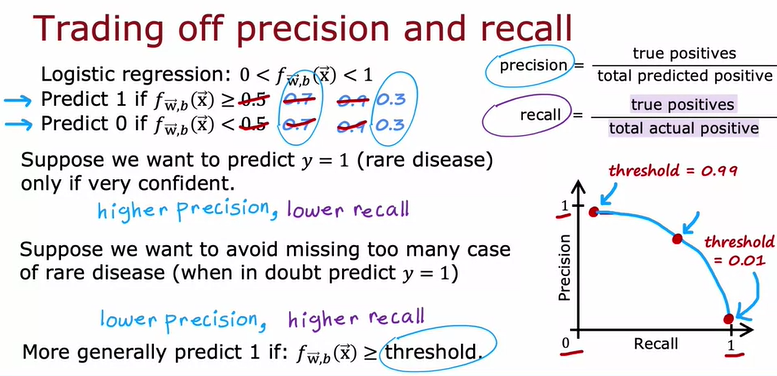


**F1 score**

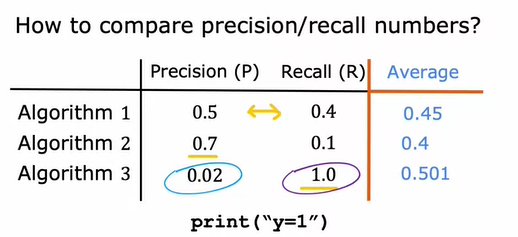

The average shows that algorithm 3 has the highest average between precision and recall. However, it show that this algorithm has very low precision, and in fact, this corresponds maybe to an algorithm that actually does print y equals 1 and diagnosis all patients as having the disease, that's why recall is perfect but the precision is really low. Algorithm 3 is actually not a particularly useful algorithm, even though the average between precision and recall is quite high.

Therefore we use F1 score, which pays more attention to whichever is lower by computing an average of short. 

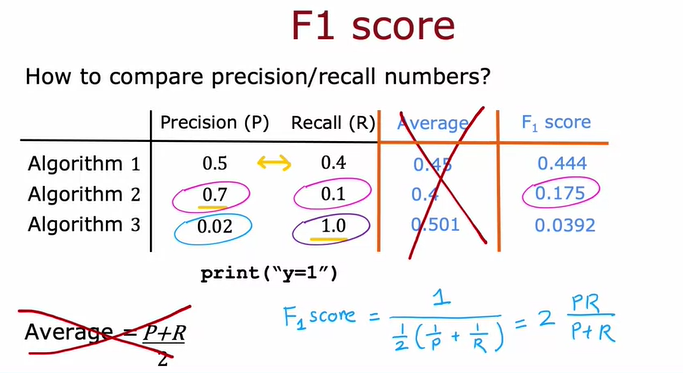

It turns out that first algorithm is better. 

The harmonic mean or P and R take the average that emphasize the low value.

### **DECISION TREE MODEL**

**Decision tree model**

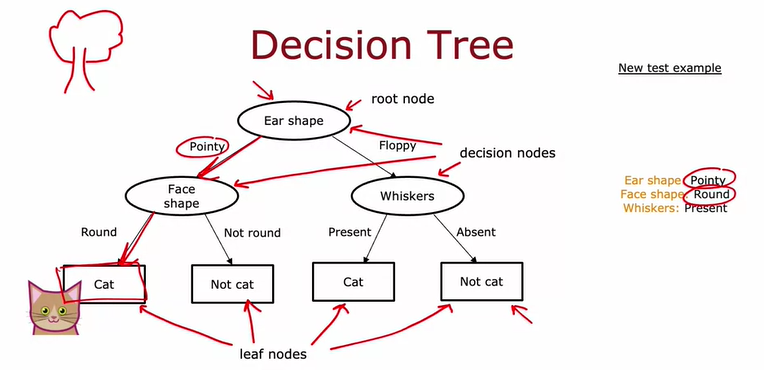

- Ovals or rectangles is called node in the tree. 
- Top-most node is called the root node
- All of oval nodes in the middle are called decision nodes
- The rectangle nodes in the bottom are called the leaf nodes. 
-> It seem not intuiative when the root of the tree is on the top. 

**Learning Process**

Some key decisions:
- Decision 1: How to choose what feature to split on at each node?

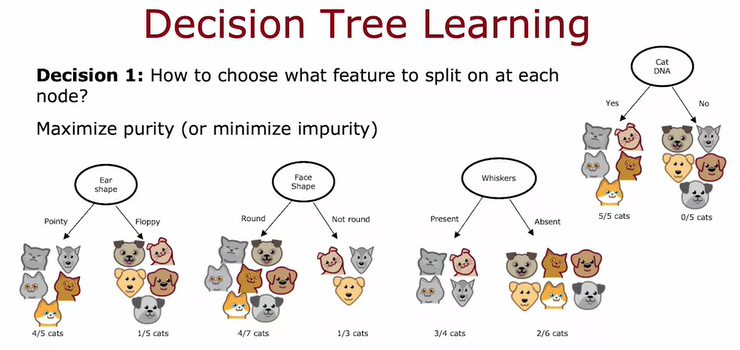

The decision tree algorithm make the prediction relied on the features with the greatest purity of the label on the left and right sub branches. If getting highly pure subset of example, the prediction is more correct. 

- Decision 2: When do you stop splitting?
    * When a node is 100% one class
    * When splitting a node will result in the tree exceeding a maximum depth (defined as number of hops)
    * When improvements npurity score are below a threshold
    * When number of examples in the node is below a threshold.

**Measuring purity**

The entropy as a measure of impurity

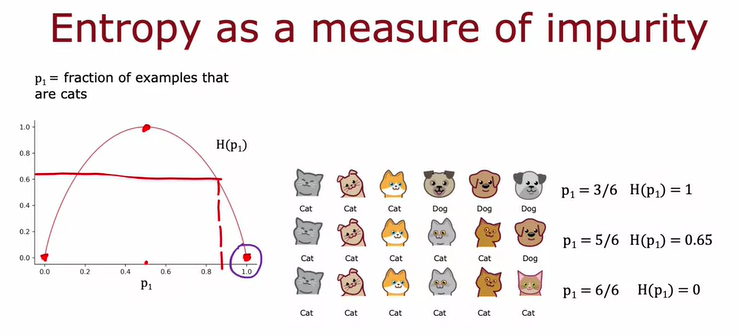

In this example, we can see that the impurity decrease from 1 to 0 or the purity increase when going from mix of cat and dog vs only cat.

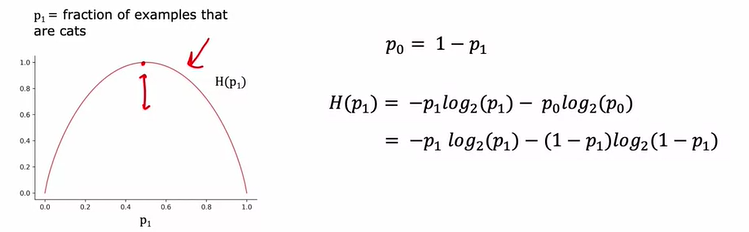

If p_1 or p_0 equal to 0, then "0 log(0) = 0"


**Choosing a split: Information gain**

If there is a node with a lot of examples in it with high entropy that seems worse than if there was a node with just a few examples in it with high entropy. Because entropy as a measure of impurity, is worse if you have a very large and impure dataset compared to just a few examples and a branch of the tree that is very impure. 

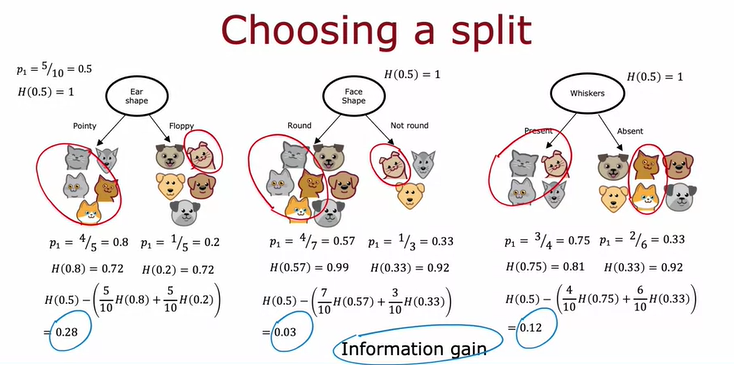

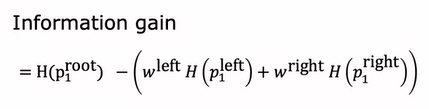

This step is used to know how to pick a feature to split on another node

**Putting it together**

Decision tree learning
- Start with all examples at the root node
- Calculate information gain for all possible features and pick the one with the highest information gain
- Split dataset according to selected feature and create left and right branches of the tree.
- Keep repeating splittng process until stopping criteria is met
    * When a node is 100% one class
    * When splitting a node wll result in the tree exceeding a maximum depth
    * Information gain from additional splits is less than threshold
    * When number of examples in a node is below a threshold.


**One hot encoding**

If a categorical feature can take on k value create k binary feature (0 or 1 valued)

**How to use continuous valued features in decision tree?**

Decide a threshold to split, then we can calculate the entropy of each time we split to compare -> select information

**Tree regression**

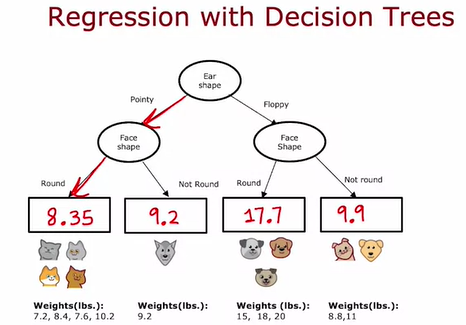

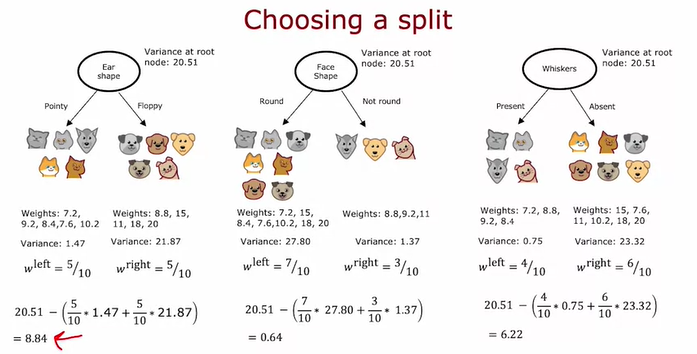

**Using multiple decision trees**

One of the weakness of using a single decision tree is that the decision tree can be highly sensitive to small changes in the data. One solution to make the arrow less sensitive or more robust is to build not one decision tree, but to build a lot of decision tree.

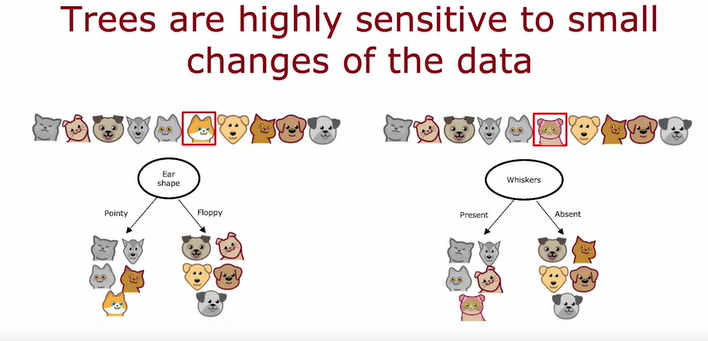

For example, when we change a data point in the dataset, for example a cat with whiskers instead of ear shape, the split will be whiskers instead of ear shape. This creates a new root node and a new tree.

Sampling with replacement to build an ensemble of tree:

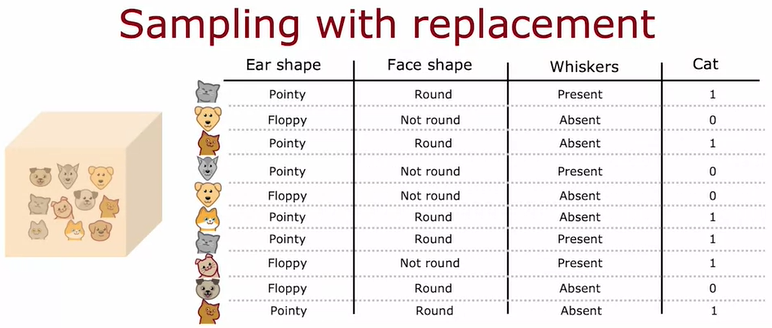


**Random forest algorithm**

Generating a tree sample

Given training set of size m

for b = 1 to B:
- Use sampling with replacement to create a new training set of size m
- Train a decision tree on the new dataset -> Get a diffrent decision tree

-> Make prediction, get these trees all votes on the correct final prediction.

Randomizing the feature choice: At each node, when choosing a feature to use to split, if n features are available, pick a random subset of k < n features and allow the algorithm to only choose from that subset of features.

**XGboost**

Boosted trees intuition
- given training set of size m
- for b = 1 to B:
    * use sampling with replacement to creat a new training set of size m (instead of picking from all example with equal (1/m) probability, make it more likely to pick misclassified examples from previously trained trees. 
    * Train a decision tree on the new dataset


The difference between random forest and XGboost:
- Ensemble approach: Both algorithms use ensemble method to improve predictive accuracy by ombining multiple model.
- Algorithm type: Random forest is based on the bagging algorithm, which builds an ensemble of decision trees independently. In contrast, XGBoost is based on the boosting algorithm, where decision trees are built sequentially, with each tree trying to correct the mistakes made by the previous trees. 
- Tree building process: Random Forest builds each decision tree independently by randomly selecting substes of the training data and featues, resulting in multiple uncorrelated trees. XGBoost builds decision trees in a sequential manner, where each subsequent tree learns from the mistakes of the previous tree by focusing on te instances that were misclassified. 
- Loss function optimization: XGBoost optimizes the loss function during the training process by using gradient boosting, which calculates the gradients of the loss function with respect to the model's predictions. Random Forest, on the other hand, does not optimize a specific loss function but uses the majority vote or averaging of multiple decision trees to make predictions.
- Handling of missing values: Random Forest can handle missing values by using surrogate splits, where it considers alternative variables to make up for missing data. XGBoost also handles missing values but uses a different approach by learning the direction of the missing values during tree construction.
- Model interpretability: Random Forest provides feature importance scores that indicate the relative importance of each feature in making predictions. XGBoost also provides feature importance scores but often offers more fine-grained information, such as feature interaction effects.
- Performance and scalability: XGBoost is known for its scalability and efficiency, as it incorporates various optimization techniques such as parallel processing and compressed sparse column storage. Random Forest can handle large datasets as well, but its performance might degrade with an increasing number of trees.


**When to use decision trees?**

Decision tree vs neural network

Decisiontrees and tree ensemble
- Work well on taular (structured data)
- Not recommended for unstructed data 
- Fast
- Small decision trees may be human interpretable

Neural networks
- Work well on all types of data, including tabular (structured) and unstructured data
- May be slower than a decision tree
- Works with transfer learning
- When building a system of multiple models working together, it might be easier to string together multiple neural networks. 